<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/Spectral_analysis_in_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral analysis in time series

When doing time series analysis, it's really common to do a spectral analysis.

Let's do:
- some time series simulation using AR (auto regressing) models;
- work on Fourier transform, implementing from scratch one of the most important algorithm in information communications technology and signal processing;
- learn about the differences between "static" FFT (fast fourier transform) and Welch's method.

# Simulating an AR (Auto Regressor) process / model

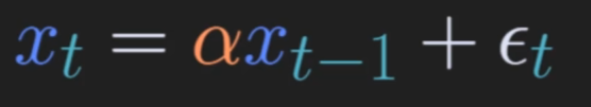

This is an equation that simulates AR(1) process. "(1)" means that we just have one time point and one weighting factor.

The data time series at time point "t" is equal to some past version of itself, multiplied by (or scaled by) some weighting factor (here is alpha, but in other cases can be "w" or phee, etc) + Epsilon (random distributed noise, people call it innovation factor or novelty factor, cause introduce additional variability into the signal).

This is the generalized formula, and it's our goal:

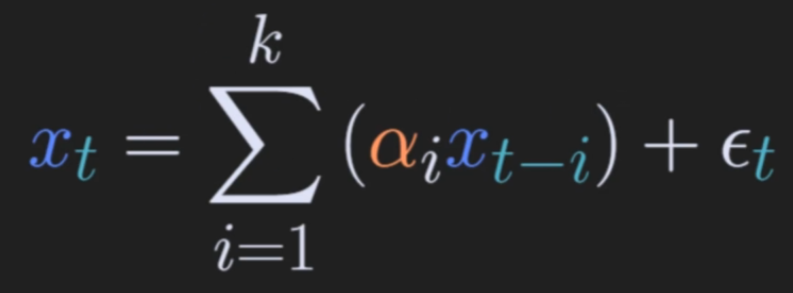

# Generating AR(2) process, getting a time series for 200 time points

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
alpha = np.array([-.6, .9])
k = len(alpha)
N = 200
x = np.zeros(N)

# adding some sine wave aspect
x += np.sin(np.linspace(0, 10 * np.pi, N))

for i in range(k, N):          # this is the Epsilon part
  x[i] = sum(alpha * x[i-k:i]) + np.random.randn()
         # this will get value of X from current index minus "k" up through index, and it's going to be multiplied by alpha (two element vector), and sum this together

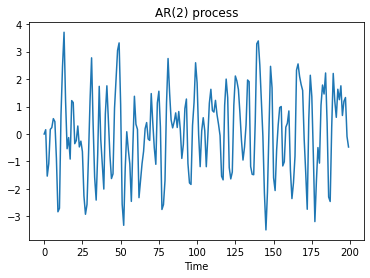

In [21]:
plt.plot(x)
plt.xlabel('Time')
plt.title('AR(%s) process'%k)
plt.show()

# Coding Fourier transform from scratch

Just using numpy! It isn't that complicated. It can be explicated using this pseudocode:


loop over N points/frequencies (looping index f)
  -  Create complex sine wave with length of signal, and frequency of looping index.

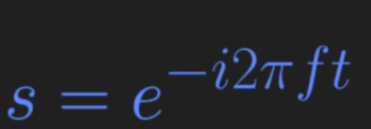

  -  Compute dot product between complex sine wave and signal.

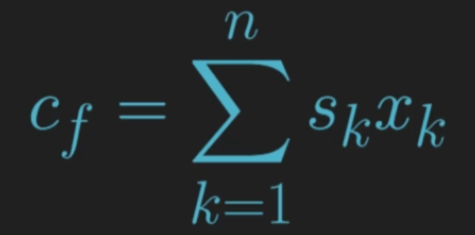

And then... we can extract:
- Amplitude, which is magnitude of Fourier coefficients.
- Phase, which is angle of Fourier coefficients.

In [27]:
# creating the for loop

# defining time vector
t = np.arange(N) / N    # normalized

# initializing Fourier coefficients
fc = np.zeros(N, dtype=complex)

# manual Fourier transform
for f in range(N):
  # create the complex sine wave
  csw = np.exp(-1j * 2 * np.pi * f * t) # "i", in python, is "1j"

  # compute the dot product between sine wave and the signal
  # fourier coefficient
  fc[f] = np.dot(csw, x)

In [28]:
fc # here we can see that for each number, we have real part and the imaginary part

array([ 13.40911628+0.00000000e+00j,  -7.50662471+2.17840433e+01j,
        21.14882807-2.35069919e+00j,   7.31889858+8.37440395e+00j,
         2.32625094+1.35567288e+01j,   8.66389844-9.98002519e+00j,
        -1.88519713-8.29600880e+00j, -16.30424865+3.02083946e+01j,
       -18.01521237+2.39465633e+01j,  -3.14262511+1.64987873e+01j,
       -12.62417029-3.36034471e+00j,  -3.91469974+2.07090574e+01j,
        19.87939682+2.04287626e+00j,  21.2779424 -4.69840942e+00j,
        11.11186691+2.50377615e+01j, -49.75023089-1.01321201e+01j,
        -7.19868567+7.19728882e+00j,  10.11320962-7.76909674e+00j,
       -11.68472768-1.56031218e+01j, -15.30095452-6.92455207e+00j,
        26.43445848-3.11977693e+00j, -22.64600972-2.09668170e+01j,
       -14.20343681-4.60609343e+01j, -21.78729384-9.56686941e+00j,
        42.16009368+4.92899543e+01j,  -7.22440323+4.40669661e+01j,
       -19.94698858+1.27728581e+01j,  10.96597017+1.42384691e+01j,
       -45.33842694+3.71507749e+01j, -14.52074165-2.63326343e+

In [31]:
# now using FFT function (fast fourier transform), which is much faster
fc2 = np.fft.fft(x)
fc2 # the same as the above

array([ 13.40911628+0.00000000e+00j,  -7.50662471+2.17840433e+01j,
        21.14882807-2.35069919e+00j,   7.31889858+8.37440395e+00j,
         2.32625094+1.35567288e+01j,   8.66389844-9.98002519e+00j,
        -1.88519713-8.29600880e+00j, -16.30424865+3.02083946e+01j,
       -18.01521237+2.39465633e+01j,  -3.14262511+1.64987873e+01j,
       -12.62417029-3.36034471e+00j,  -3.91469974+2.07090574e+01j,
        19.87939682+2.04287626e+00j,  21.2779424 -4.69840942e+00j,
        11.11186691+2.50377615e+01j, -49.75023089-1.01321201e+01j,
        -7.19868567+7.19728882e+00j,  10.11320962-7.76909674e+00j,
       -11.68472768-1.56031218e+01j, -15.30095452-6.92455207e+00j,
        26.43445848-3.11977693e+00j, -22.64600972-2.09668170e+01j,
       -14.20343681-4.60609343e+01j, -21.78729384-9.56686941e+00j,
        42.16009368+4.92899543e+01j,  -7.22440323+4.40669661e+01j,
       -19.94698858+1.27728581e+01j,  10.96597017+1.42384691e+01j,
       -45.33842694+3.71507749e+01j, -14.52074165-2.63326343e+

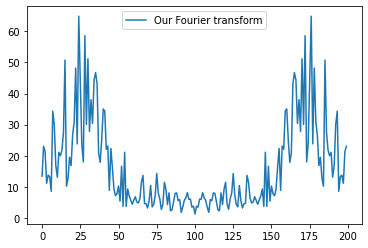

In [33]:
plt.plot(np.abs(fc), label='Our Fourier transform')
plt.legend()
plt.show()

The negatives frequencies are mirroring the positives frequencies. We don't need the negative frequencies. Let's isolate.

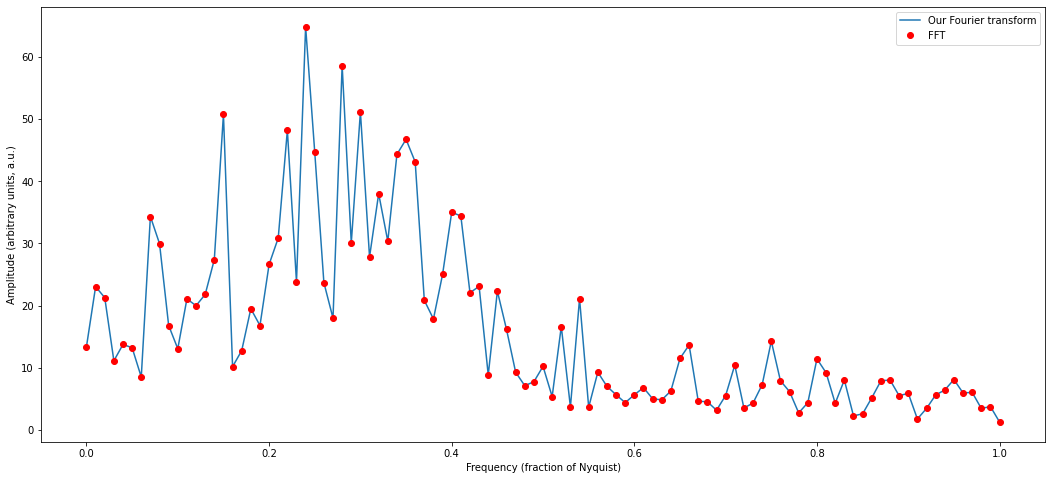

In [39]:
hz = np.linspace(0, 1, int(N / 2 + 1))

plt.figure(figsize=[18, 8])
plt.plot(hz, np.abs(fc[:len(hz)]), label='Our Fourier transform')
plt.plot(hz, np.abs(fc2[:len(hz)]), 'ro', label='FFT')
plt.legend()
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (arbitrary units, a.u.)')
plt.show()

# Zero-padding the FFT

Zero padding = pad time series signals with zeros. In other words, adding a bunch of zeroes after time series signal.

There are several advantages of zero-padding:
- it smooths out the signal representation in the frequency domain. Look in the graphs below, specially the green lines. It's zero-padded, and smoother than 21-point FT (without zero-padding):

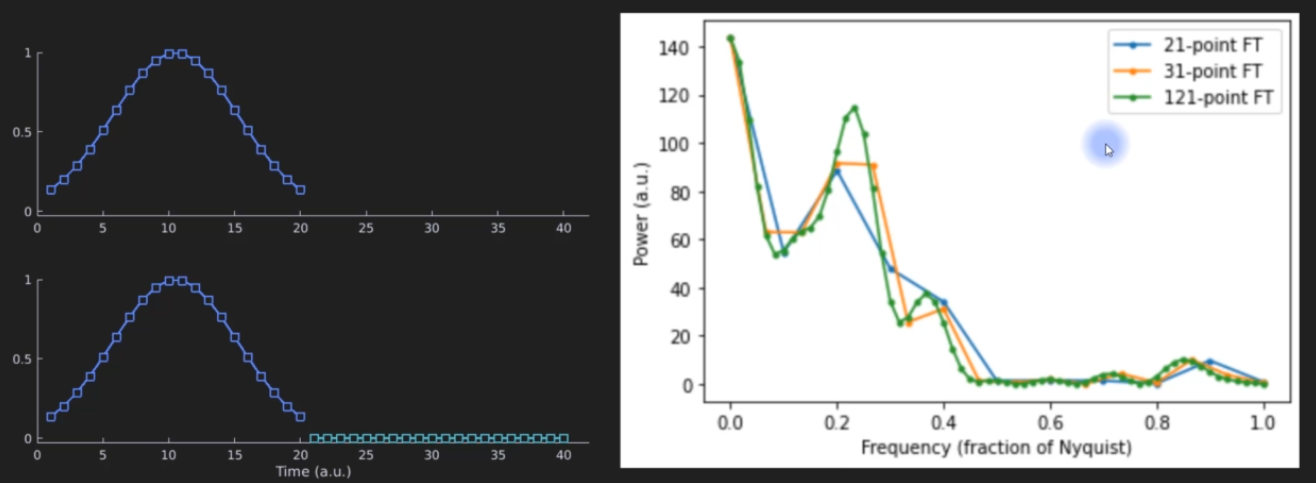

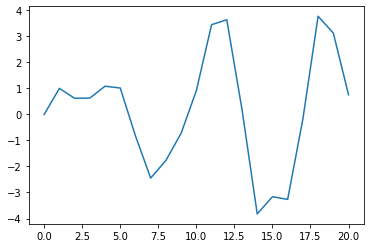

In [40]:
alpha = np.array([-.6, .9])
k = len(alpha)
N = 21 # same as the example above
x = np.zeros(N)

# adding some sine wave aspect
x += np.sin(np.linspace(0, 10 * np.pi, N))

for i in range(k, N):          # this is the Epsilon part
  x[i] = sum(alpha * x[i-k:i]) + np.random.randn()
         # this will get value of X from current index minus "k" up through index, and it's going to be multiplied by alpha (two element vector), and sum this together

plt.plot(x)

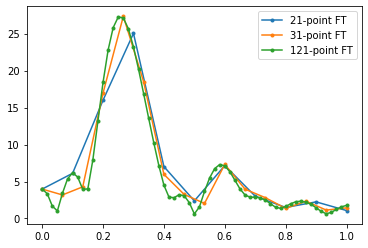

In [52]:
for i in range(3): # three different levels of zero-padding

  # specify the number of FFT points (including zero-padding)
  nfft = N + 10**i * int(i!=0)   # N + 1... 10... 100

  # compute FFT
  xX = np.fft.fft(x, n=nfft) # the "n" parameter tells python if it need to be zero-padded or not, by comparing with N
  
  # compute HZ vector
  hz = np.linspace(0, 1, int(nfft/2+1))

  # plot the amplitude spectrum
  plt.plot(hz, np.abs(xX[:len(hz)]), '.-', label='%s-point FT'%nfft)


plt.legend()
plt.show()
